In [ ]:
# ======================================================
# NOTEBOOK 02 – TF-IDF Analysis
# ======================================================

# === Cell 1: Install & import ===
%pip install scikit-learn matplotlib seaborn tqdm --quiet

import os, json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set_style("whitegrid")
tqdm.pandas()

In [ ]:
# === Cell 2: Load cleaned dataset ===
# Pastikan file clean_link_emirates.csv sudah ada di /content
csv_path = "/content/clean_link_emirates.csv"
df = pd.read_csv(csv_path, parse_dates=['date'], low_memory=False)
print("Loaded dataset:", df.shape)
display(df.head(2))

Loaded dataset: (150, 13)


,url,title,date,content_raw,content_lower,content_nopunct,text_before_stop,text_after_stop,text_lemmatized,wc_raw,wc_nopunct,wc_before,wc_after
0,https://www.emirates.com/media-centre/the-emir...,"‘The Emirates App’ now launches on iPhone, ope...",2014-11-16,"Dubai, UAE, 16 November 2014 – Building on the...",dubai uae 16 november 2014 – building on the s...,dubai uae november building on the s...,dubai uae 16 november 2014 – building on the s...,dubai uae november building successful launch ...,dubai uae november building successful launch ...,432,432,444,265
1,https://www.emirates.com/media-centre/emirates...,"Emirates expands its mobile footprint, launche...",2015-05-18,The Emirates App now available on the world’s ...,the emirates app now available on the world’s ...,the emirates app now available on the world s ...,the emirates app now available on the world ’ ...,emirates app available world largest mobile pl...,emirate app available world large mobile platf...,451,456,466,265


In [ ]:
# === Cell 3: Pilih kolom teks ===
text_col = None
for candidate in ["text_lemmatized","text_after_stop","content_lower","content_nopunct","content_raw"]:
    if candidate in df.columns and df[candidate].notna().sum()>0:
        text_col = candidate
        break

if text_col is None:
    raise ValueError("Tidak ada kolom teks yang cocok ditemukan!")

print(f"Using text column: {text_col}")

Using text column: text_lemmatized


In [ ]:
# === Cell 4: Setup direktori output ===
os.makedirs("/content/data", exist_ok=True)
os.makedirs("/content/figures", exist_ok=True)

# === Tentukan kolom teks yang mau dipakai ===
text_col = "text_lemmatized"  # bisa diganti 'text_after_stop' jika belum lemmatized
print("Menggunakan kolom:", text_col)

Menggunakan kolom: text_lemmatized


In [ ]:
# === Cell 5: TF-IDF overall ===
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tfidf_params = {
    "max_features": 5000,
    "ngram_range": (1,2),
    "min_df": 3
}

vectorizer = TfidfVectorizer(**tfidf_params)
X = vectorizer.fit_transform(df[text_col].fillna("").astype(str))

feature_names = vectorizer.get_feature_names_out()
mean_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_idx = mean_tfidf.argsort()[::-1][:30]

top_df = pd.DataFrame({
    "term": feature_names[top_idx],
    "mean_tfidf": mean_tfidf[top_idx]
})

Menggunakan kolom teks: text_lemmatized

✅ File disimpan ke: /content/data/tfidf_top30_overall.csv

📊 Top 30 Kata dengan Nilai TF-IDF Tertinggi (Keseluruhan):


,term,mean_tfidf
0,emirates,0.055998
1,airline,0.053167
2,flight,0.044404
3,emirate,0.044130
4,dubai,0.040755
5,year,0.036183
6,travel,0.031190
7,class,0.030427
8,airport,0.030373
9,aircraft,0.030311


/tmp/ipython-input-3896198127.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="term", x="mean_tfidf", data=top_df.head(20), palette="viridis")


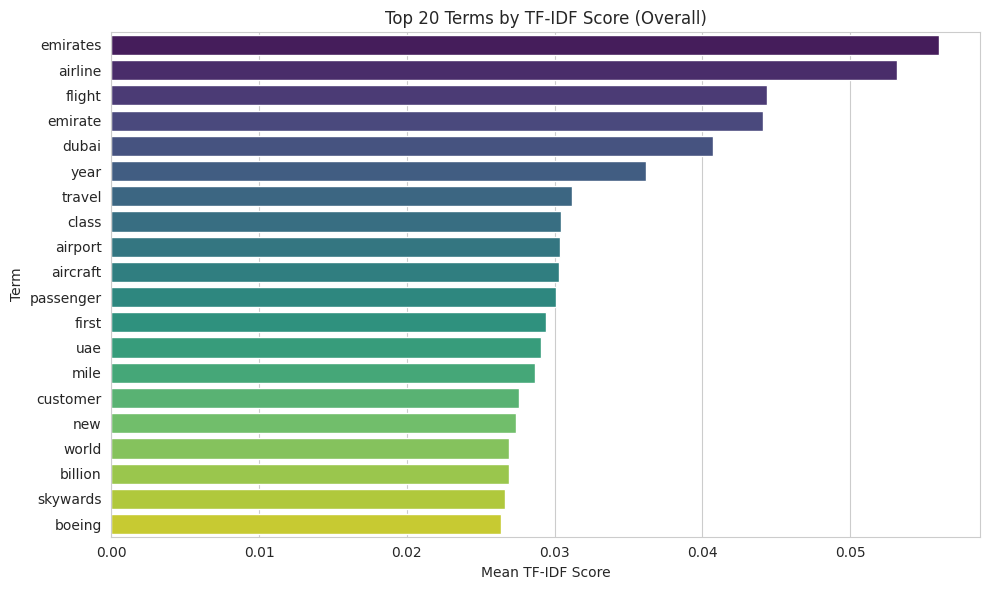

✅ Visualisasi disimpan ke: /content/figures/tfidf_top20_overall.png


In [ ]:
# === Cell: TF-IDF Overall + Visualisasi + Tabel Hasil ===
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# === Setup direktori output ===
os.makedirs("/content/data", exist_ok=True)
os.makedirs("/content/figures", exist_ok=True)

# === Tentukan kolom teks ===
text_col = "text_lemmatized"  # ubah ke 'text_after_stop' kalau kolom ini belum ada
print(f"Menggunakan kolom teks: {text_col}\n")

# === Hitung TF-IDF ===
tfidf_params = {
    "max_features": 5000,
    "ngram_range": (1, 2),
    "min_df": 3
}

vectorizer = TfidfVectorizer(**tfidf_params)
X = vectorizer.fit_transform(df[text_col].fillna("").astype(str))

feature_names = vectorizer.get_feature_names_out()
mean_tfidf = np.asarray(X.mean(axis=0)).ravel()
top_idx = mean_tfidf.argsort()[::-1][:30]

top_df = pd.DataFrame({
    "term": feature_names[top_idx],
    "mean_tfidf": mean_tfidf[top_idx]
})

# === Simpan hasil ===
top_path_csv = "/content/data/tfidf_top30_overall.csv"
top_path_fig = "/content/figures/tfidf_top20_overall.png"

top_df.to_csv(top_path_csv, index=False)
print(f"✅ File disimpan ke: {top_path_csv}")

# === Tampilkan tabel hasil ===
print("\n📊 Top 30 Kata dengan Nilai TF-IDF Tertinggi (Keseluruhan):")
display(top_df.head(30))

# === Visualisasi ===
plt.figure(figsize=(10,6))
sns.barplot(y="term", x="mean_tfidf", data=top_df.head(20), palette="viridis")
plt.title("Top 20 Terms by TF-IDF Score (Overall)")
plt.xlabel("Mean TF-IDF Score")
plt.ylabel("Term")
plt.tight_layout()
plt.savefig(top_path_fig, dpi=300)
plt.show()

print(f"✅ Visualisasi disimpan ke: {top_path_fig}")